# 1990 California Housing Prices
## Objective: Given a set of attributes, predict the median housing price

- Follow along Chapter 2 of Geron's "Hands-on Machine Learning" book
- California Housing Prices data from 1990 California census
- Dataset from R.Kelley Pace and Ronald Barry, "Sparse Spatial Autoregressions," *Statistics and Probability Letters* 33, no. 3 (1997): 291-297

***
## Assumptions:
- Data has labels (median housing prices) that can be used with supervised learning
- Outputs will be numerical (prices) and not categorical

## Setup:

In [83]:
import os
import tarfile
import urllib.request

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

***
## Fetch housing data:

In [85]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [86]:
fetch_housing_data()

***
## Load data:

In [87]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [88]:
housing = load_housing_data()

***
## Inspect data

**Observations:** 
- There are 10 attributes, all but one are numerical data. 
- There are 20,640 entries total, note that the `total_bedrooms` only has 20,433 non-null values
- The `ocean_proximity` attribute is categorical and has five categories.

In [89]:
# Look at the first 5 rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [90]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [92]:
# Descriptive statistics for each attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***
## Initial data visualization:

**Observations:**
- median_income has been scaled and capped between 0.4999 - 15.0001. median_income is expressed in 10,000 dollars.
- median_age is capped at 52
- median_house_value is capped at 500,000 <- maybe a problem
- attributes have different scales
- histograms are tail-heavy

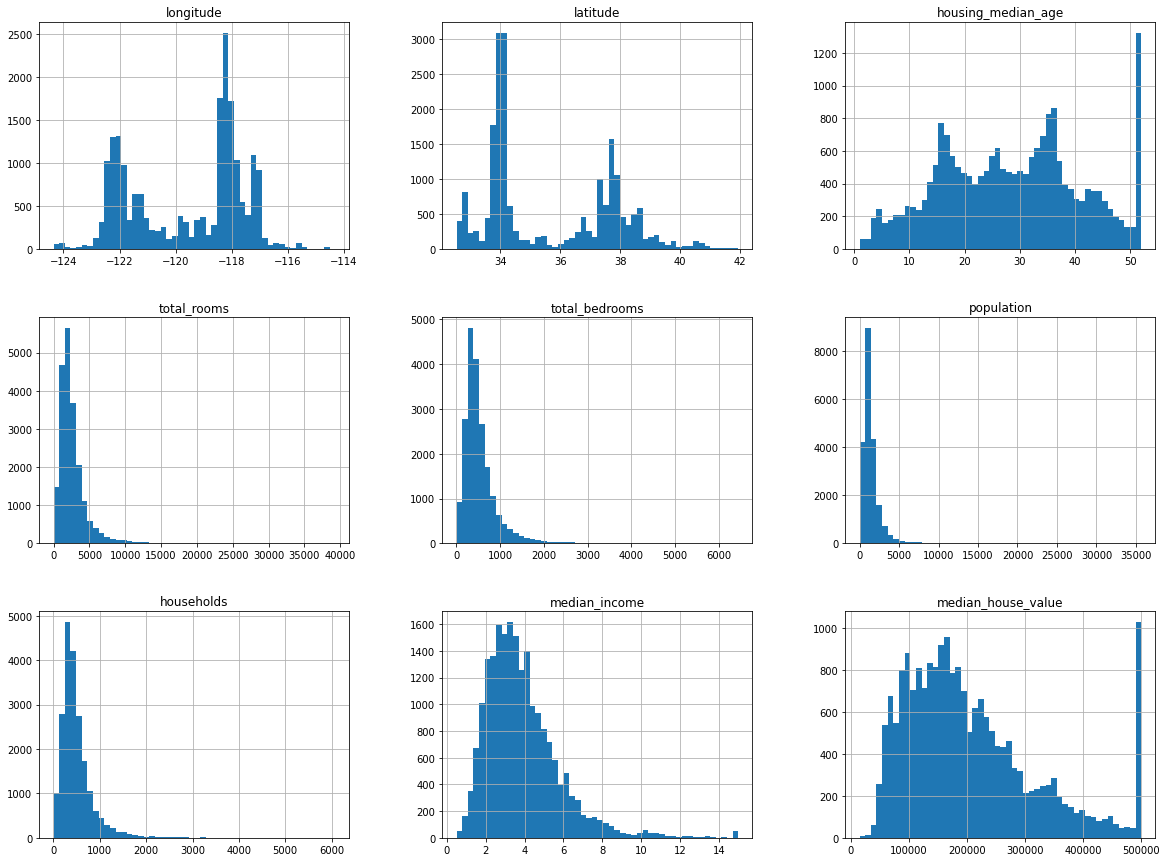

In [93]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

***
## Create a test set

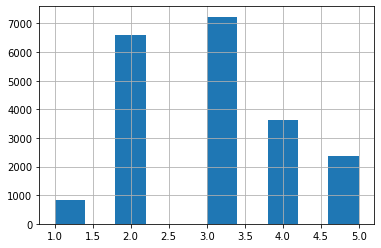

In [94]:
import numpy as np

# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Stratified sampling based on median_income
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()
housing["income_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [95]:
# Check income category proportions in test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [96]:
# Check income category proportions in full set
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [97]:
# Remove income_cat attribute to return data to original state   
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

***
## Visualize Training Set

In [98]:
housing = strat_train_set.copy()

### 1. Geographical Data

Saving figure housing_geographical_plot


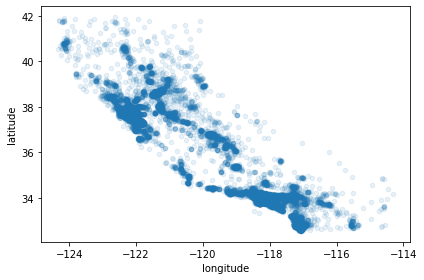

In [99]:
# "alpha=0.1" helps to visualize overlaying points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("housing_geographical_plot")

Saving figure housing_prices_plot


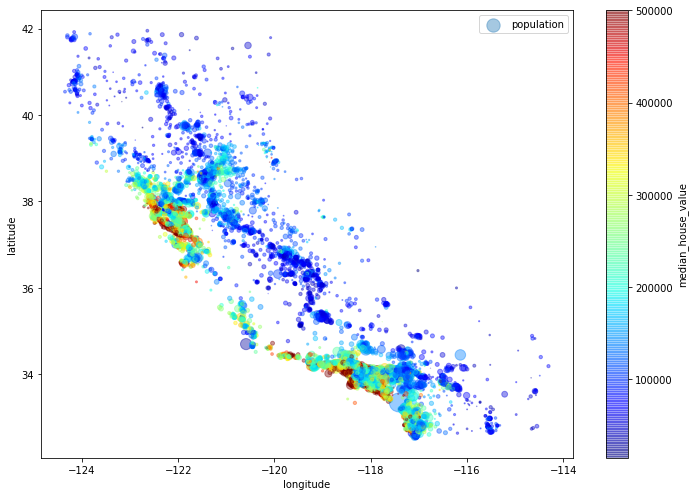

In [100]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_plot")

### 2. Correlations

In [101]:
# Compute the standard correlation coefficients between every pair of attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


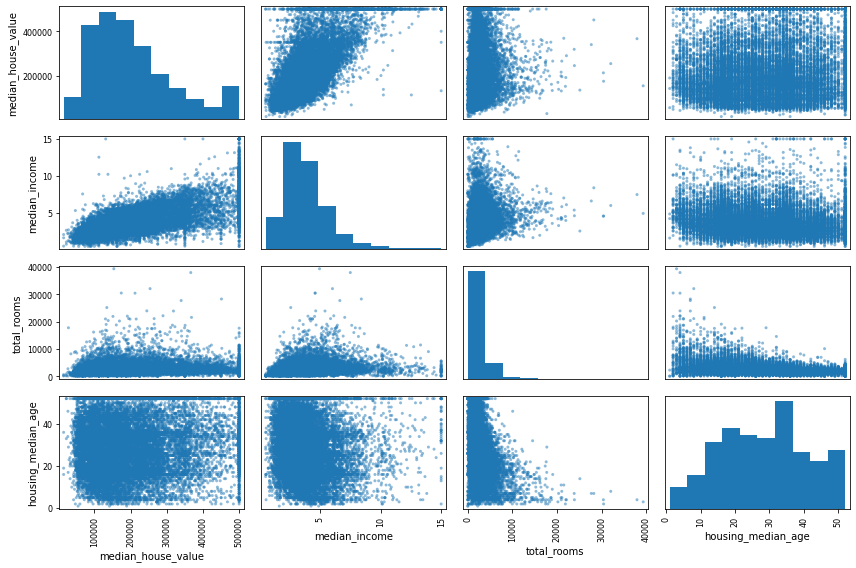

In [102]:
# Examine the scatter matrix plots 
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatter_plot


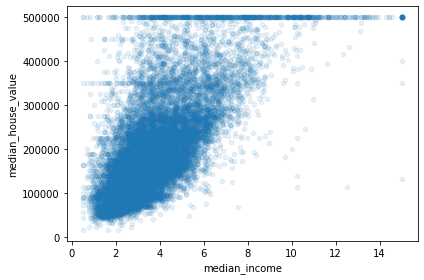

In [103]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
save_fig("income_vs_house_value_scatter_plot")

In [104]:
# Examine new attributes
# Here the new bedrooms_per_room correlates with median_house_value better than total_bedrooms and total_rooms
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### *Side note: Custom transformers

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [106]:
attr_adder = combinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

***
## Prepare data for ML algorithms

In [107]:
# Separate the predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 1. Data Cleaning - handle missing values
Recall total_bedrooms attribute has some missing values. There are three options
1. Get rid of the corresponding districts
2. Get rid of the whole attribute
3. *Set the values to some value (zero, mean, median, etc.)

In [108]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [109]:
# Use imputer from sklearn to handle all numerical values
# median is computed for all numerical attributes and stored in the statistics_ instance variable
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop(["ocean_proximity"], axis=1) #drop categorical attribute

housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [110]:
imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [111]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [112]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [113]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [114]:
# One-hot encoding for categorical attribute
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) #SciPy sparse matrix

In [115]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [116]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [117]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2. Feature Scaling
Two common ways to get all attributes to have the same scale:
1. **min-max scaling**: (x - min)/(max - min), range 0-1, use `MinMaxScaler` from `sklearn`
2. **standardization**: (x - mean)/SD, no range, use `StandardScaler` from `sklearn`

Here we will use standardization because it is not affected by outliers

### 3. Transformation Pipeline

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', combinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num) # transform numerical vals

In [119]:
# for both numerical and categorical 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("nums", num_pipeline, num_attribs), #(name, transformer, list of names/indices of columns to be transformed)
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

***
## Select and train models

In [120]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [121]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### *Cross Validation
Split training set into a training set and validation set to evaluate the decision tree model 

In [122]:
#Scikit-Learn cross-validation uses utility function rather than a cost function
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10) #10 folds, train model 10 times, picking a different fold for each time
tree_rmse_score = np.sqrt(-scores) 

In [123]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [124]:
display_scores(tree_rmse_score)

Scores:  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean:  71407.68766037929
Standard deviation:  2439.4345041191004


In [125]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)

In [126]:
display_scores(lin_rmse_score)

Scores:  [66778.33540064 66967.28906602 70347.95244419 74765.48544403
 68031.13388938 71228.01426477 64960.61724364 68274.2715297
 71552.91566558 67665.10082067]
Mean:  69057.11157686297
Standard deviation:  2741.1360125330416


**Observation:** The decision tree model is overfitting the data and performs worse than linear regression

In [127]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18603.515021376355

In [128]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)

display_scores(forest_rmse_score)

Scores:  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean:  50182.303100336096
Standard deviation:  2097.0810550985693


***
## Fine-tune the Model
Some possible strategies:
1. Grid Search
2. Randomized Search
3. Ensemble Methods

### Grid Search

In [129]:
# Grid Search specific hyperparameter values
# Thisa search will run 3*4 + 2*3 = 18 combinations and each will train 5 times --> 90 rounds
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, #bootstrap on
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]} #bootstrap off
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameters found

In [130]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [131]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination...

In [132]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### Randomized Search

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state=42)
rdn_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, 
                               n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rdn_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f42f40d00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f426d3670>},
                   random_state=42, scoring='neg_mean_squared_error')

Best parameters found

In [134]:
rdn_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [135]:
cvres = rdn_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


***
## Analyze the random forest (best model) and its error

In [136]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [137]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

***
## Evaluate best model on test set

In [138]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [139]:
final_rmse

47730.22690385927

We can compute the 95% confidence interval for RMSE using t-test

In [140]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

In [141]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m-1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776014, 49691.25001877871)

Alternatively, we can use z-score

In [142]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136594, 49690.68623889426)

***
## Full pipeline with preparation and prediction 

In [143]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849])

***
## Model Persistence with `joblib` 

In [144]:
my_model = full_pipeline_with_predictor

In [145]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

***
## Chapter 2 (Selected) Exercises:

**1. Question: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?**

In [157]:
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 
                                 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg = SVR()
grid_search_svm = GridSearchCV(svm_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error", verbose=2)
grid_search_svm.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   8.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.5s
[CV] END .............................C=100.0, kernel=linear; total time=   8.7s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  18.3s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  18.4s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  18.5s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  18.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.3s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  18.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  18.2s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  18.1s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.1s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  15.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  15.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  15.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [158]:
negative_mse = grid_search_svm.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.84006006805

The SVM performs worse than random forest.

**3. Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.**

In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [1]:
k = 5 #Select the top 5 features

In [150]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [151]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [152]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

**4. Question: Try creating a single pipeline that does the full data preparation plus the final prediction.**

In [153]:
#Note, we have 10 features and we only want to use 7 (from randomized search earlier)
# so x*10 = 7 -> x=max_features= 0.7
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('forest_reg', RandomForestRegressor(n_estimators = 108, 
                   max_features=0.7)) 
])

prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   combinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                   

Test on some data

In [154]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
some_predictions = prepare_select_and_predict_pipeline.predict(some_data)
print("Predictions:\t", some_predictions)
print("Labels:\t\t", list(some_labels))

Predictions:	 [261680.55555556 338377.7962963  213330.55555556  48030.55555556]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


In [155]:
forest_rmse = mean_squared_error(some_labels, some_predictions, squared=False)
forest_rmse

14990.621060479525

Test the full pipeline on the whole data set (data prep, select top 5 features, use the best params)... Quite an improvement from just using all of the features in the random forest

In [156]:
forest_improved_predictions = prepare_select_and_predict_pipeline.predict(housing)

forest_rmse = mean_squared_error(housing_labels, forest_improved_predictions, squared=False)
forest_rmse

18474.34860820624

Best p

**5. Question: Automatically explore some preparation options using GridSearchCV.**

In [159]:
param_grid = [{
    'preparation__nums__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=mean; total time=   2.0s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=mean; total time=   2.1s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=mean; total time=   2.0s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=mean; total time=   2.1s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=mean; total time=   2.1s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=median; total time=   1.9s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=median; total time=   2.0s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=median; total time=   2.0s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=median; total time=   2.0s
[CV] END feature_selection__k=1, preparation__nums__imputer__strategy=media

[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=median; total time=   3.9s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=median; total time=   3.8s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=most_frequent; total time=   3.9s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=most_frequent; total time=   3.8s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=most_frequent; total time=   3.8s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=most_frequent; total time=   4.0s
[CV] END feature_selection__k=6, preparation__nums__imputer__strategy=most_frequent; total time=   4.0s
[CV] END feature_selection__k=7, preparation__nums__imputer__strategy=mean; total time=   4.1s
[CV] END feature_selection__k=7, preparation__nums__imputer__strategy=mean; total time=   4.0s
[CV] END feature_selection__k=7, preparation__nums__imputer__strategy=mean; total time=   4.0s
[

[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=median; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=median; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=median; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=median; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=median; total time=   7.5s
[CV] END feature_selection__k=12, preparation__nums__imputer__strategy=most_frequent; total time=   7.6s
[CV] END feature_sele

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          combinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
      

In [160]:
grid_search_prep.best_params_

{'feature_selection__k': 8, 'preparation__nums__imputer__strategy': 'median'}